In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import os
import json
import numpy as np
import pandas as pd
sys.path.insert(0, os.path.abspath("../optimizer/"))
sys.path.insert(0, os.path.abspath("../plotting/"))
from utilization_sweep_plot import load_all
import utils
import matplotlib.pyplot as plt

In [7]:
pipeline = "pipeline_three"
high_load_df = load_all(1.0, pipeline)

In [8]:
high_load_df

,lam,slo_miss_rate,utilization
5,100,0.0,0.50
0,119,0.0,0.60
8,143,0.0,0.70
6,150,0.0,0.75
2,163,0.0,0.80
1,173,0.0,0.85
4,185,0.0,0.90
7,194,0.0,0.95
3,203,0.0,1.00


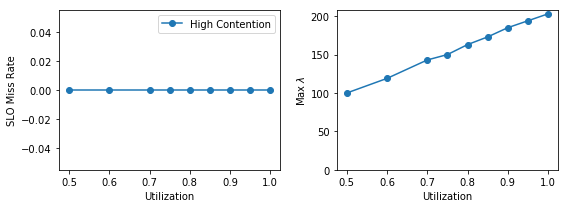

In [9]:
fig, (ax_slo, ax_lam) = plt.subplots(ncols=2, figsize=(8,3))
ax_slo.plot(high_load_df.utilization, high_load_df.slo_miss_rate, "o-", label="High Contention")
ax_lam.plot(high_load_df.utilization, high_load_df.lam, "o-", label="High Contention")

# ax.plot(low_load_df.utilization, low_load_df.slo_miss_rate, label="Low Contention")
ax_slo.set_ylabel("SLO Miss Rate")
ax_lam.set_ylabel("Max $\lambda$")

ax_slo.set_xlabel("Utilization")
ax_lam.set_xlabel("Utilization")
ax_lam.set_ylim(bottom=0)


ax_slo.legend(loc=0)
fig.tight_layout()
plt.savefig("utilization_sensitivity_{}.png".format(pipeline))
plt.show()


In [ ]:
def load_run(path):
    with open(path, "r") as f:
        results = json.load(f)
        return results
    
def get_latencies_inferline_e2e(results_json):
    trials = results_json["throughput_results"]["client_metrics"][0][1:]
    lats = []
    for t in trials:
        datalists = t["data_lists"]
        for d in datalists:
            if list(d.keys())[0] == "e2e:prediction_latencies":
                items = d["e2e:prediction_latencies"]["items"]
                for i in items:
                    lats.append(float(list(i.values())[0]) / 1000.0 / 1000.0)
    lats = np.array(lats)
    return lats

res = load_run("../results_cpp_benchmarker/e2e_results/image_driver_1/util_sweep/high_load/image_driver_one_slo_0.5_cv_1.0_util_0.5/aws_lambda_197_cost_10.6_inception-2_tf-kernel-svm-1_tf-resnet-feats-2_tf-log-reg-1-180419_211313.json")

In [ ]:
slo = res["loaded_config"]["slo"]
utilization = res["loaded_config"]["utilization"]
lats = get_latencies_inferline_e2e(res)

In [ ]:
slo_miss_rate = np.sum(lats > slo) / len(lats)

In [ ]:
slo_miss_rate